In [476]:
import yfinance as yf
import mplfinance as mpf

btc = yf.Ticker('BTC-USD')

btc_hist = btc.history(period='1mo', interval='15m')

# drop the columns that are not needed
btc_hist.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

print(len(btc_hist))

btc_hist

2881


,Open,High,Low,Close,Volume
Datetime,,,,,
2024-06-12 21:00:00+00:00,68092.273438,68206.882812,68092.273438,68206.882812,62507008
2024-06-12 21:15:00+00:00,68222.984375,68365.148438,68199.835938,68365.148438,77096960
2024-06-12 21:30:00+00:00,68381.828125,68576.734375,68356.968750,68576.734375,280418304
2024-06-12 21:45:00+00:00,68573.875000,68597.265625,68453.710938,68527.867188,154542080
2024-06-12 22:00:00+00:00,68506.132812,68515.921875,68407.562500,68413.750000,36225024
...,...,...,...,...,...
2024-07-12 20:00:00+00:00,57609.152344,57636.160156,57537.054688,57582.093750,141912064
2024-07-12 20:15:00+00:00,57499.863281,57499.863281,57187.011719,57333.296875,210339840
2024-07-12 20:30:00+00:00,57363.621094,57512.480469,57363.621094,57512.480469,171300864


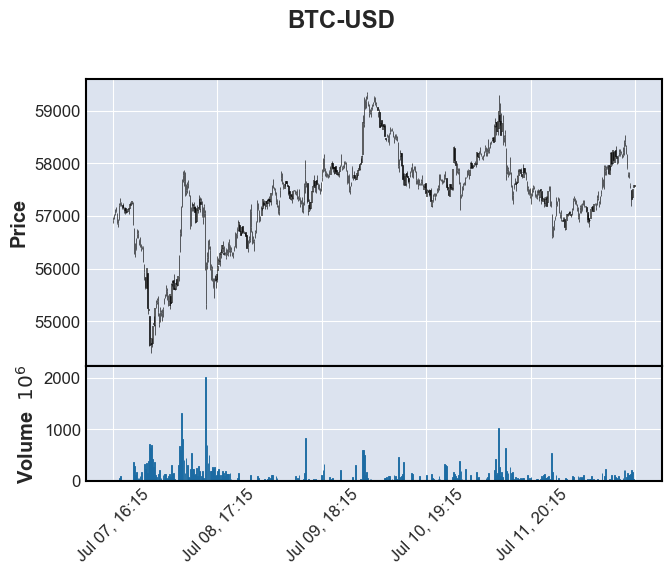

In [477]:
mpf.plot(btc_hist[-500:], type='candle', volume=True, title='BTC-USD')

In [478]:
# compute most popular indicators using ta library.
import pandas as pd
import pandas_ta as ta

btc_hist.set_index(pd.DatetimeIndex(btc_hist.index), inplace=True)

# # moving averages
btc_hist.ta.sma(length=10, append=True)
btc_hist.ta.sma(length=50, append=True)
btc_hist.ta.sma(length=200, append=True)

# exponential moving averages
btc_hist.ta.ema(length=10, append=True)
btc_hist.ta.ema(length=50, append=True)
btc_hist.ta.ema(length=200, append=True)

# RSI
btc_hist.ta.rsi(length=14, append=True)

# MACD
btc_hist.ta.macd(append=True)

# Bollinger Bands
btc_hist.ta.bbands(append=True)

# ATR
btc_hist.ta.atr(append=True)

# ADX
btc_hist.ta.adx(append=True)

# Stochastics
btc_hist.ta.stoch(append=True)
btc_hist.ta.stochrsi(append=True)

btc_hist

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBB_5_2.0,BBP_5_2.0,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-12 21:00:00+00:00,68092.273438,68206.882812,68092.273438,68206.882812,62507008,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-12 21:15:00+00:00,68222.984375,68365.148438,68199.835938,68365.148438,77096960,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-12 21:30:00+00:00,68381.828125,68576.734375,68356.968750,68576.734375,280418304,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-12 21:45:00+00:00,68573.875000,68597.265625,68453.710938,68527.867188,154542080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-12 22:00:00+00:00,68506.132812,68515.921875,68407.562500,68413.750000,36225024,NaN,NaN,NaN,NaN,NaN,...,0.760704,0.491687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12 20:00:00+00:00,57609.152344,57636.160156,57537.054688,57582.093750,141912064,58036.123437,57650.066016,57663.502324,57938.576011,57767.095203,...,1.366333,0.170808,182.602672,28.885301,21.789650,33.298647,5.494800,8.982686,0.000000,0.000000
2024-07-12 20:15:00+00:00,57499.863281,57499.863281,57187.011719,57333.296875,210339840,57952.458203,57655.475703,57662.113828,57828.525259,57750.083503,...,1.399905,0.077649,197.779769,29.507497,18.680601,41.189314,5.662406,5.365353,0.000000,0.000000
2024-07-12 20:30:00+00:00,57363.621094,57512.480469,57363.621094,57512.480469,171300864,57885.126563,57662.339063,57661.814238,57771.062570,57740.765737,...,1.172991,0.378210,196.451471,30.005346,17.922312,38.505827,13.194917,8.117374,7.204075,2.401358


In [479]:
dataset = btc_hist.copy()

First row index: 2024-06-14 22:45:00+00:00


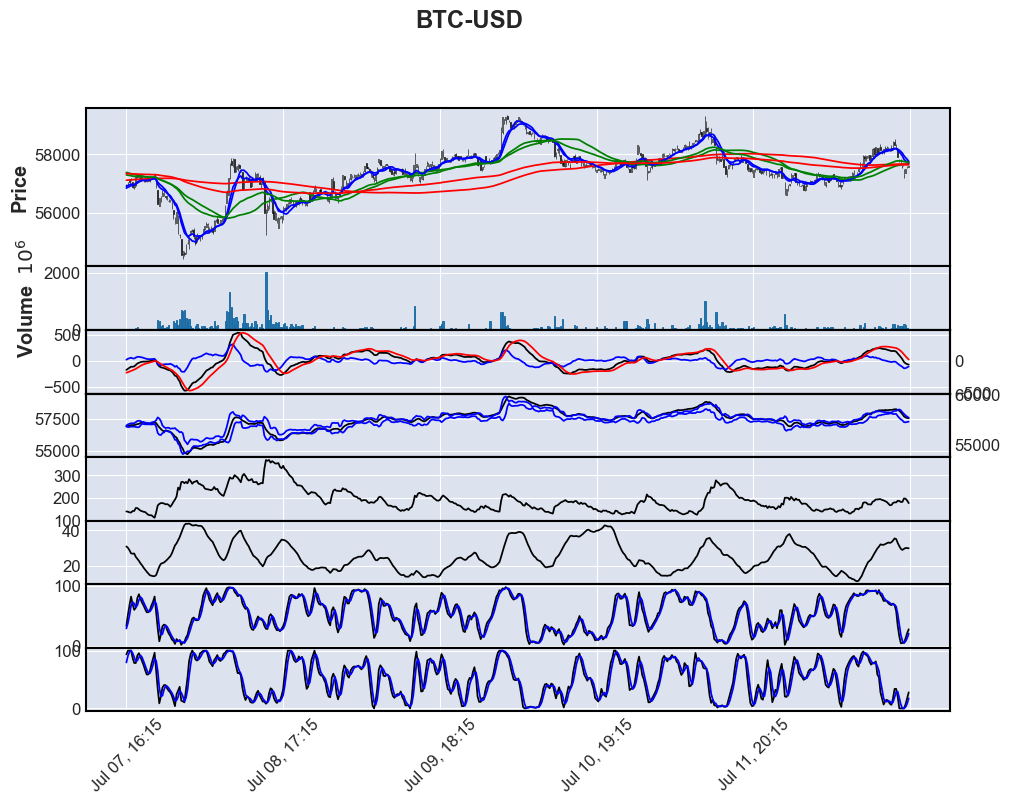

In [480]:
# find the first row index that has no NaN values. Similar to first_valid_index but return the row where all columns are not NaN
first_row = dataset.notnull().all(axis=1).idxmax()

print(f'First row index: {first_row}')

# drop the preceding rows
dataset = dataset.loc[first_row:]

to_plot = dataset[-500:]

# plot the data with the SMAs and EMAs, taking full screen width
mpf.plot(to_plot, type='candle', volume=True, title='BTC-USD', addplot=[
    mpf.make_addplot(to_plot['SMA_10'], color='blue'),
    mpf.make_addplot(to_plot['SMA_50'], color='green'),
    mpf.make_addplot(to_plot['SMA_200'], color='red'),
    mpf.make_addplot(to_plot['EMA_10'], color='blue'),
    mpf.make_addplot(to_plot['EMA_50'], color='green'),
    mpf.make_addplot(to_plot['EMA_200'], color='red'),
    mpf.make_addplot(to_plot['RSI_14'], panel=1, color='black'),
    mpf.make_addplot(to_plot['MACD_12_26_9'], panel=2, color='black'),
    mpf.make_addplot(to_plot['MACDh_12_26_9'], panel=2, color='blue'),
    mpf.make_addplot(to_plot['MACDs_12_26_9'], panel=2, color='red'),
    mpf.make_addplot(to_plot['BBM_5_2.0'], panel=3, color='black'),
    mpf.make_addplot(to_plot['BBU_5_2.0'], panel=3, color='blue'),
    mpf.make_addplot(to_plot['BBL_5_2.0'], panel=3, color='blue'),
    mpf.make_addplot(to_plot['ATRr_14'], panel=4, color='black'),
    mpf.make_addplot(to_plot['ADX_14'], panel=5, color='black'),
    mpf.make_addplot(to_plot['STOCHk_14_3_3'], panel=6, color='black'),
    mpf.make_addplot(to_plot['STOCHd_14_3_3'], panel=6, color='blue'),
    mpf.make_addplot(to_plot['STOCHRSIk_14_14_3_3'], panel=7, color='black'),
    mpf.make_addplot(to_plot['STOCHRSId_14_14_3_3'], panel=7, color='blue'),
], figscale=1.5)

In [481]:
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBB_5_2.0,BBP_5_2.0,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-14 22:45:00+00:00,65984.148438,66004.953125,65959.640625,65979.484375,66537472,65936.071094,66190.901563,67011.100547,65916.312741,66087.762819,...,0.537169,0.382642,183.862885,24.828527,41.294107,26.313847,54.018172,57.283412,69.199431,73.735912
2024-06-14 23:00:00+00:00,65978.070312,65978.070312,65882.265625,65887.125000,0,65951.953906,66171.934375,66999.501758,65911.005879,66079.894669,...,0.237582,0.039000,177.674016,24.239042,39.680171,28.396032,50.912660,53.548241,62.300202,67.503766
2024-06-14 23:15:00+00:00,65880.546875,65988.328125,65880.546875,65980.312500,53377024,65978.185938,66154.803594,66987.577578,65923.607083,66075.989486,...,0.211136,0.683680,172.681674,23.730285,38.335418,27.130052,48.481996,51.137609,58.242543,63.247392
2024-06-14 23:30:00+00:00,65983.226562,66031.140625,65978.437500,65990.195312,25796608,66005.235156,66138.201094,66974.644883,65935.714034,66072.625009,...,0.228430,0.691741,164.111775,23.425455,39.319440,26.507724,44.936121,48.110259,51.055836,57.199527
2024-06-14 23:45:00+00:00,65981.687500,66039.132812,65981.687500,66010.328125,6268928,66002.955469,66118.611719,66962.057188,65949.280232,66070.181994,...,0.258638,0.739354,156.492739,23.174950,38.653275,25.812692,42.983011,45.467043,52.660537,53.986306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12 20:00:00+00:00,57609.152344,57636.160156,57537.054688,57582.093750,141912064,58036.123437,57650.066016,57663.502324,57938.576011,57767.095203,...,1.366333,0.170808,182.602672,28.885301,21.789650,33.298647,5.494800,8.982686,0.000000,0.000000
2024-07-12 20:15:00+00:00,57499.863281,57499.863281,57187.011719,57333.296875,210339840,57952.458203,57655.475703,57662.113828,57828.525259,57750.083503,...,1.399905,0.077649,197.779769,29.507497,18.680601,41.189314,5.662406,5.365353,0.000000,0.000000
2024-07-12 20:30:00+00:00,57363.621094,57512.480469,57363.621094,57512.480469,171300864,57885.126563,57662.339063,57661.814238,57771.062570,57740.765737,...,1.172991,0.378210,196.451471,30.005346,17.922312,38.505827,13.194917,8.117374,7.204075,2.401358


In [482]:
# add a new column to the dataset that is the close value of the next row. This will be used to predict the next close value.
dataset['Next Close'] = dataset['Close'].shift(-1)
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBP_5_2.0,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,Next Close
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-14 22:45:00+00:00,65984.148438,66004.953125,65959.640625,65979.484375,66537472,65936.071094,66190.901563,67011.100547,65916.312741,66087.762819,...,0.382642,183.862885,24.828527,41.294107,26.313847,54.018172,57.283412,69.199431,73.735912,65887.125000
2024-06-14 23:00:00+00:00,65978.070312,65978.070312,65882.265625,65887.125000,0,65951.953906,66171.934375,66999.501758,65911.005879,66079.894669,...,0.039000,177.674016,24.239042,39.680171,28.396032,50.912660,53.548241,62.300202,67.503766,65980.312500
2024-06-14 23:15:00+00:00,65880.546875,65988.328125,65880.546875,65980.312500,53377024,65978.185938,66154.803594,66987.577578,65923.607083,66075.989486,...,0.683680,172.681674,23.730285,38.335418,27.130052,48.481996,51.137609,58.242543,63.247392,65990.195312
2024-06-14 23:30:00+00:00,65983.226562,66031.140625,65978.437500,65990.195312,25796608,66005.235156,66138.201094,66974.644883,65935.714034,66072.625009,...,0.691741,164.111775,23.425455,39.319440,26.507724,44.936121,48.110259,51.055836,57.199527,66010.328125
2024-06-14 23:45:00+00:00,65981.687500,66039.132812,65981.687500,66010.328125,6268928,66002.955469,66118.611719,66962.057188,65949.280232,66070.181994,...,0.739354,156.492739,23.174950,38.653275,25.812692,42.983011,45.467043,52.660537,53.986306,65984.117188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12 20:00:00+00:00,57609.152344,57636.160156,57537.054688,57582.093750,141912064,58036.123437,57650.066016,57663.502324,57938.576011,57767.095203,...,0.170808,182.602672,28.885301,21.789650,33.298647,5.494800,8.982686,0.000000,0.000000,57333.296875
2024-07-12 20:15:00+00:00,57499.863281,57499.863281,57187.011719,57333.296875,210339840,57952.458203,57655.475703,57662.113828,57828.525259,57750.083503,...,0.077649,197.779769,29.507497,18.680601,41.189314,5.662406,5.365353,0.000000,0.000000,57512.480469
2024-07-12 20:30:00+00:00,57363.621094,57512.480469,57363.621094,57512.480469,171300864,57885.126563,57662.339063,57661.814238,57771.062570,57740.765737,...,0.378210,196.451471,30.005346,17.922312,38.505827,13.194917,8.117374,7.204075,2.401358,57589.281250


In [483]:
print(f'Number of NaN values in the dataset: {dataset.isnull().sum().sum()}')

# drop the last row as it has NaN values
dataset.dropna(inplace=True)

print(f'Number of NaN values in the dataset after dropping: {dataset.isnull().sum().sum()}')

dataset

Number of NaN values in the dataset: 1
Number of NaN values in the dataset after dropping: 0


,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBP_5_2.0,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,Next Close
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-14 22:45:00+00:00,65984.148438,66004.953125,65959.640625,65979.484375,66537472,65936.071094,66190.901563,67011.100547,65916.312741,66087.762819,...,0.382642,183.862885,24.828527,41.294107,26.313847,54.018172,57.283412,69.199431,73.735912,65887.125000
2024-06-14 23:00:00+00:00,65978.070312,65978.070312,65882.265625,65887.125000,0,65951.953906,66171.934375,66999.501758,65911.005879,66079.894669,...,0.039000,177.674016,24.239042,39.680171,28.396032,50.912660,53.548241,62.300202,67.503766,65980.312500
2024-06-14 23:15:00+00:00,65880.546875,65988.328125,65880.546875,65980.312500,53377024,65978.185938,66154.803594,66987.577578,65923.607083,66075.989486,...,0.683680,172.681674,23.730285,38.335418,27.130052,48.481996,51.137609,58.242543,63.247392,65990.195312
2024-06-14 23:30:00+00:00,65983.226562,66031.140625,65978.437500,65990.195312,25796608,66005.235156,66138.201094,66974.644883,65935.714034,66072.625009,...,0.691741,164.111775,23.425455,39.319440,26.507724,44.936121,48.110259,51.055836,57.199527,66010.328125
2024-06-14 23:45:00+00:00,65981.687500,66039.132812,65981.687500,66010.328125,6268928,66002.955469,66118.611719,66962.057188,65949.280232,66070.181994,...,0.739354,156.492739,23.174950,38.653275,25.812692,42.983011,45.467043,52.660537,53.986306,65984.117188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12 19:45:00+00:00,57837.316406,57837.316406,57716.257812,57729.246094,127997952,58094.180469,57638.075859,57663.928437,58017.794291,57774.646282,...,0.207524,181.865077,29.500178,23.560948,28.425805,4.938854,18.517830,0.000000,6.598169,57582.093750
2024-07-12 20:00:00+00:00,57609.152344,57636.160156,57537.054688,57582.093750,141912064,58036.123437,57650.066016,57663.502324,57938.576011,57767.095203,...,0.170808,182.602672,28.885301,21.789650,33.298647,5.494800,8.982686,0.000000,0.000000,57333.296875
2024-07-12 20:15:00+00:00,57499.863281,57499.863281,57187.011719,57333.296875,210339840,57952.458203,57655.475703,57662.113828,57828.525259,57750.083503,...,0.077649,197.779769,29.507497,18.680601,41.189314,5.662406,5.365353,0.000000,0.000000,57512.480469


In [484]:
# add a new column to the dataset that is the percentage change of the close value of the next row.
dataset['Expected Change'] = (dataset['Next Close'] - dataset['Close']) / dataset['Close']
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,Next Close,Expected Change
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-14 22:45:00+00:00,65984.148438,66004.953125,65959.640625,65979.484375,66537472,65936.071094,66190.901563,67011.100547,65916.312741,66087.762819,...,183.862885,24.828527,41.294107,26.313847,54.018172,57.283412,69.199431,73.735912,65887.125000,-0.001400
2024-06-14 23:00:00+00:00,65978.070312,65978.070312,65882.265625,65887.125000,0,65951.953906,66171.934375,66999.501758,65911.005879,66079.894669,...,177.674016,24.239042,39.680171,28.396032,50.912660,53.548241,62.300202,67.503766,65980.312500,0.001414
2024-06-14 23:15:00+00:00,65880.546875,65988.328125,65880.546875,65980.312500,53377024,65978.185938,66154.803594,66987.577578,65923.607083,66075.989486,...,172.681674,23.730285,38.335418,27.130052,48.481996,51.137609,58.242543,63.247392,65990.195312,0.000150
2024-06-14 23:30:00+00:00,65983.226562,66031.140625,65978.437500,65990.195312,25796608,66005.235156,66138.201094,66974.644883,65935.714034,66072.625009,...,164.111775,23.425455,39.319440,26.507724,44.936121,48.110259,51.055836,57.199527,66010.328125,0.000305
2024-06-14 23:45:00+00:00,65981.687500,66039.132812,65981.687500,66010.328125,6268928,66002.955469,66118.611719,66962.057188,65949.280232,66070.181994,...,156.492739,23.174950,38.653275,25.812692,42.983011,45.467043,52.660537,53.986306,65984.117188,-0.000397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12 19:45:00+00:00,57837.316406,57837.316406,57716.257812,57729.246094,127997952,58094.180469,57638.075859,57663.928437,58017.794291,57774.646282,...,181.865077,29.500178,23.560948,28.425805,4.938854,18.517830,0.000000,6.598169,57582.093750,-0.002549
2024-07-12 20:00:00+00:00,57609.152344,57636.160156,57537.054688,57582.093750,141912064,58036.123437,57650.066016,57663.502324,57938.576011,57767.095203,...,182.602672,28.885301,21.789650,33.298647,5.494800,8.982686,0.000000,0.000000,57333.296875,-0.004321
2024-07-12 20:15:00+00:00,57499.863281,57499.863281,57187.011719,57333.296875,210339840,57952.458203,57655.475703,57662.113828,57828.525259,57750.083503,...,197.779769,29.507497,18.680601,41.189314,5.662406,5.365353,0.000000,0.000000,57512.480469,0.003125


In [485]:
# start of the ML part
# goal is to predict the 'Expected Change' column using the other columns in the dataset (except 'Next Close' column).
# the model will perform a regression task.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split the dataset into features and target
X = dataset.drop(columns=['Next Close', 'Expected Change'])

# target
Y = dataset['Expected Change']

In [486]:
X

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBB_5_2.0,BBP_5_2.0,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-14 22:45:00+00:00,65984.148438,66004.953125,65959.640625,65979.484375,66537472,65936.071094,66190.901563,67011.100547,65916.312741,66087.762819,...,0.537169,0.382642,183.862885,24.828527,41.294107,26.313847,54.018172,57.283412,69.199431,73.735912
2024-06-14 23:00:00+00:00,65978.070312,65978.070312,65882.265625,65887.125000,0,65951.953906,66171.934375,66999.501758,65911.005879,66079.894669,...,0.237582,0.039000,177.674016,24.239042,39.680171,28.396032,50.912660,53.548241,62.300202,67.503766
2024-06-14 23:15:00+00:00,65880.546875,65988.328125,65880.546875,65980.312500,53377024,65978.185938,66154.803594,66987.577578,65923.607083,66075.989486,...,0.211136,0.683680,172.681674,23.730285,38.335418,27.130052,48.481996,51.137609,58.242543,63.247392
2024-06-14 23:30:00+00:00,65983.226562,66031.140625,65978.437500,65990.195312,25796608,66005.235156,66138.201094,66974.644883,65935.714034,66072.625009,...,0.228430,0.691741,164.111775,23.425455,39.319440,26.507724,44.936121,48.110259,51.055836,57.199527
2024-06-14 23:45:00+00:00,65981.687500,66039.132812,65981.687500,66010.328125,6268928,66002.955469,66118.611719,66962.057188,65949.280232,66070.181994,...,0.258638,0.739354,156.492739,23.174950,38.653275,25.812692,42.983011,45.467043,52.660537,53.986306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12 19:45:00+00:00,57837.316406,57837.316406,57716.257812,57729.246094,127997952,58094.180469,57638.075859,57663.928437,58017.794291,57774.646282,...,1.541674,0.207524,181.865077,29.500178,23.560948,28.425805,4.938854,18.517830,0.000000,6.598169
2024-07-12 20:00:00+00:00,57609.152344,57636.160156,57537.054688,57582.093750,141912064,58036.123437,57650.066016,57663.502324,57938.576011,57767.095203,...,1.366333,0.170808,182.602672,28.885301,21.789650,33.298647,5.494800,8.982686,0.000000,0.000000
2024-07-12 20:15:00+00:00,57499.863281,57499.863281,57187.011719,57333.296875,210339840,57952.458203,57655.475703,57662.113828,57828.525259,57750.083503,...,1.399905,0.077649,197.779769,29.507497,18.680601,41.189314,5.662406,5.365353,0.000000,0.000000


In [487]:
Y

Datetime
2024-06-14 22:45:00+00:00   -0.001400
2024-06-14 23:00:00+00:00    0.001414
2024-06-14 23:15:00+00:00    0.000150
2024-06-14 23:30:00+00:00    0.000305
2024-06-14 23:45:00+00:00   -0.000397
                               ...   
2024-07-12 19:45:00+00:00   -0.002549
2024-07-12 20:00:00+00:00   -0.004321
2024-07-12 20:15:00+00:00    0.003125
2024-07-12 20:30:00+00:00    0.001335
2024-07-12 20:45:00+00:00    0.000173
Name: Expected Change, Length: 2681, dtype: float64

In [488]:
# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [489]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (2412, 28)
X_test shape: (269, 28)
Y_train shape: (2412,)
Y_test shape: (269,)


In [490]:
X_train

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBB_5_2.0,BBP_5_2.0,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-07-10 07:45:00+00:00,58982.855469,58982.855469,58875.925781,58981.941406,18200576,59066.031250,58245.808359,57281.183672,59028.837317,58386.517718,...,0.672400,0.230319,165.852696,36.769032,35.705618,25.088528,48.799908,66.837250,0.000000,7.875153
2024-07-04 10:45:00+00:00,57617.296875,57877.753906,57617.296875,57877.753906,97857536,57601.249609,58902.647891,60648.284551,57748.792719,58687.954466,...,0.905374,0.950598,247.739886,50.977498,21.256541,40.133803,38.725210,32.304570,85.366418,70.105111
2024-06-19 05:30:00+00:00,65453.238281,65518.617188,65453.238281,65478.203125,0,65492.198438,65045.407109,65582.050410,65443.059893,65201.510157,...,0.177610,0.695212,150.718481,20.202604,32.513327,20.806836,64.105278,67.811950,29.049792,38.426215
2024-07-04 05:15:00+00:00,58822.769531,58884.613281,58822.769531,58884.613281,13651968,58924.871484,59735.761719,61162.449531,58961.473870,59618.652241,...,0.451185,0.547739,191.748162,43.151861,16.590214,47.431122,61.194764,50.050134,92.783393,78.676188
2024-07-07 13:15:00+00:00,57105.539062,57142.335938,56887.480469,56915.285156,286046208,57350.631641,57677.928281,57025.524629,57312.126470,57571.180323,...,1.414003,0.089597,132.073579,18.853483,19.110314,49.539246,5.870095,8.405873,0.000000,5.500202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-02 00:15:00+00:00,62796.453125,62876.785156,62751.875000,62876.785156,21880832,62869.207031,63023.495703,62223.608281,62900.569483,63011.820178,...,0.157282,0.868142,113.418798,22.383595,22.718783,32.515850,16.838023,14.073080,36.367777,30.090595
2024-06-26 08:30:00+00:00,61504.535156,61509.605469,61436.515625,61509.605469,16134144,61588.298828,61816.021016,61234.834980,61589.261720,61707.918054,...,0.571772,0.277421,107.157065,21.719322,16.319198,35.606653,17.564829,33.068559,25.714829,52.319545
2024-06-26 17:15:00+00:00,60944.652344,61031.351562,60833.796875,61031.351562,96794624,61285.855078,61471.440859,61201.407129,61279.585210,61480.159788,...,1.438795,0.275343,183.815867,21.519913,14.829487,38.057249,9.048874,15.902175,4.868151,12.437520


In [491]:
from sklearn.preprocessing import StandardScaler

# scale the features
scaler = StandardScaler()

# scale while keeping the column names and datetime
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# the LSTM expects a 3D input, so reshape the data
X_train_scaled = X_train_scaled.values.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.values.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [492]:
X_train_scaled

array([[[-0.7087704 , -0.73285668, -0.71552575, ...,  0.6567344 ,
         -1.58877806, -1.40336908]],

       [[-1.12015414, -1.06735251, -1.09282453, ..., -0.62669129,
          1.14325363,  0.68091155]],

       [[ 1.24047606,  1.24540954,  1.25615307, ...,  0.69295966,
         -0.65908047, -0.38011615]],

       ...,

       [[-0.11776586, -0.11281103, -0.12861537, ..., -1.23629517,
         -1.43297977, -1.2505608 ]],

       [[ 0.02765289,  0.01045203,  0.03509166, ...,  0.60960189,
          1.37797022,  1.1888802 ]],

       [[ 0.74628908,  0.72909324,  0.74441813, ..., -0.85185338,
          0.04295781, -0.62459936]]])

In [493]:
X_test_scaled

array([[[ 0.88631698,  0.86978424,  0.89679247, ..., -0.57821202,
         -0.49945892, -0.52013911]],

       [[ 0.37752964,  0.37117609,  0.39267238, ..., -0.40830525,
          1.19910649,  0.96610296]],

       [[ 0.04605426,  0.04110463,  0.06762721, ...,  0.27538459,
          0.07651565,  0.09489394]],

       ...,

       [[ 0.17111229,  0.16324446,  0.19206792, ..., -0.87589775,
         -0.54617901, -0.50529953]],

       [[-0.17490226, -0.15561589, -0.15223863, ..., -0.76473042,
          0.35012099,  0.3233261 ]],

       [[-1.27397983, -1.29139612, -1.25749644, ..., -0.7115527 ,
         -1.2649381 , -1.3176694 ]]])

In [257]:
# now the same process but with a neural network (use MLPRegressor)
from sklearn.neural_network import MLPRegressor

# create the model
model = MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=100000, random_state=42, alpha=0.0001,
                     learning_rate_init=0.001, learning_rate='constant', tol=1e-4, n_iter_no_change=10,
                     validation_fraction=0.1,
                     early_stopping=True,
                     activation='tanh',
                     solver='adam',
                     verbose=0
                     )

# train the model
model.fit(X_train_scaled, Y_train)

# print number of iterations
print(f'Number of iterations: {model.n_iter_}')

ValueError: Found array with dim 3. MLPRegressor expected <= 2.

In [494]:
import os
import numpy as np

space = np.logspace(-2, -5, 10)

pd.Series(space)

0    0.010000
1    0.004642
2    0.002154
3    0.001000
4    0.000464
5    0.000215
6    0.000100
7    0.000046
8    0.000022
9    0.000010
dtype: float64

In [62]:
parameter_space = {
    'hidden_layer_sizes': [(20, 20)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate_init': space
}

from sklearn.model_selection import GridSearchCV

cpu_count = os.cpu_count()
print(f'Number of CPUs: {cpu_count}')

clf = GridSearchCV(model, parameter_space, n_jobs=cpu_count-1, verbose=2)
clf.fit(X_train_scaled, Y_train)

print(f'Best parameters found: {clf.best_params_}')

Number of CPUs: 8
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.004641588833612777, 'solver': 'adam'}


AttributeError: 'Sequential' object has no attribute 'loss_curve_'

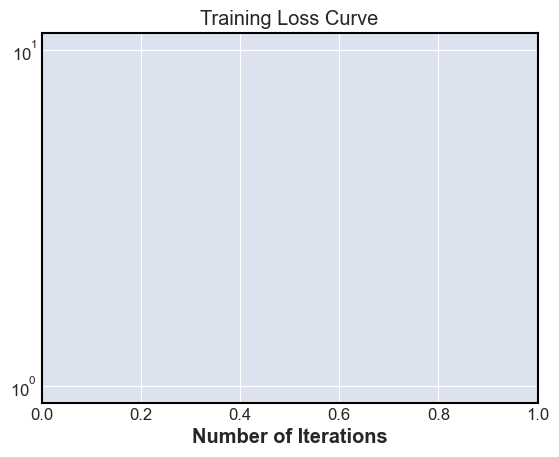

In [495]:
# plot the training loss, use log scale for y-axis
# also add the validation scores
import matplotlib.pyplot as plt

plt.yscale('log')
plt.xlabel('Number of Iterations')
plt.title('Training Loss Curve')

plt.plot(model.loss_curve_, label='Training Loss')
plt.legend()
plt.show()

# also plot the validation scores
plt.yscale('log')
plt.xlabel('Number of Iterations')
plt.title('Validation Scores')

# opposite the validation scores
values = [1 - x for x in model.validation_scores_]

plt.plot(values, label='Validation Scores')
plt.legend()
plt.show()

In [496]:
# make predictions
predictions = model.predict(X_test_scaled)

# calculate the mean squared error
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')

pd.Series(predictions, name='Predictions')


2024-07-12 23:04:20.159457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [32,1,28], In[1]: [6,100]
	 [[{{node sequential_77_1/dense_147_1/MatMul}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_77_1/dense_147_1/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/Users/yannrolland/.pyenv/versions/3.12.2/lib/python3.12/asyncio/base_events.py", line 639, in run_forever

  File "/Users/yannrolland/.pyenv/versions/3.12.2/lib/python3.12/asyncio/base_events.py", line 1985, in _run_once

  File "/Users/yannrolland/.pyenv/versions/3.12.2/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/var/folders/5c/pd3__zb57qnbp85j251mkcz80000gq/T/ipykernel_39214/1222165356.py", line 2, in <module>

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 508, in predict

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/models/sequential.py", line 209, in call

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/models/functional.py", line 175, in call

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/models/functional.py", line 556, in call

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py", line 144, in call

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/ops/numpy.py", line 3445, in matmul

  File "/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/keras/src/backend/tensorflow/numpy.py", line 483, in matmul

Matrix size-incompatible: In[0]: [32,1,28], In[1]: [6,100]
	 [[{{node sequential_77_1/dense_147_1/MatMul}}]] [Op:__inference_one_step_on_data_distributed_3213419]

In [497]:
# plot the predictions vs the actual values as a scatter plot. Use the same scale for both axes.
import matplotlib.pyplot as plt

assert len(Y_test) == len(predictions)

plt.scatter(Y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Values')

global_min = min(min(Y_test), min(predictions))
global_max = max(max(Y_test), max(predictions))

plt.xlim(global_min, global_max)
plt.ylim(global_min, global_max)

plt.plot([global_min, global_max], [global_min, global_max], color='red')

plt.show()


AssertionError: 

In [498]:
# show expected and predicted values as a dataframe
df = pd.DataFrame({'Expected': Y_test, 'Predicted': predictions})

# add a percentage of error column
df['Error %'] = np.abs((df['Expected'] - df['Predicted']) / df['Expected']) * 100

# format percentage of error column
df['Error %'] = df['Error %'].map('{:.2f}%'.format)

df

ValueError: array length 288 does not match index length 269

In [499]:
import tensorflow as tf

# import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

# now train a model using keras and tensorflow on mac m1

input_count = X_train_scaled.shape[2]
print(f'Number of input features: {input_count}')

training_size = int(0.99 * X_train_scaled.shape[0])
validation_size = X_train_scaled.shape[0] - training_size

print(f'Training size: {training_size}, Validation size: {validation_size}')

Number of input features: 28
Training size: 2387, Validation size: 25


In [500]:
X_train_scaled

array([[[-0.7087704 , -0.73285668, -0.71552575, ...,  0.6567344 ,
         -1.58877806, -1.40336908]],

       [[-1.12015414, -1.06735251, -1.09282453, ..., -0.62669129,
          1.14325363,  0.68091155]],

       [[ 1.24047606,  1.24540954,  1.25615307, ...,  0.69295966,
         -0.65908047, -0.38011615]],

       ...,

       [[-0.11776586, -0.11281103, -0.12861537, ..., -1.23629517,
         -1.43297977, -1.2505608 ]],

       [[ 0.02765289,  0.01045203,  0.03509166, ...,  0.60960189,
          1.37797022,  1.1888802 ]],

       [[ 0.74628908,  0.72909324,  0.74441813, ..., -0.85185338,
          0.04295781, -0.62459936]]])

In [501]:
Y_train

Datetime
2024-07-10 07:45:00+00:00   -0.004767
2024-07-04 10:45:00+00:00    0.000933
2024-06-19 05:30:00+00:00   -0.000453
2024-07-04 05:15:00+00:00    0.000922
2024-07-07 13:15:00+00:00   -0.001515
                               ...   
2024-07-02 00:15:00+00:00   -0.000869
2024-06-26 08:30:00+00:00   -0.000510
2024-06-26 17:15:00+00:00   -0.000394
2024-06-28 10:15:00+00:00    0.000574
2024-06-23 21:45:00+00:00   -0.001639
Name: Expected Change, Length: 2412, dtype: float64

In [502]:
training_size = int(0.99 * X_train_scaled.shape[0])
validation_size = X_train_scaled.shape[0] - training_size

print(f'Training size: {training_size}, Validation size: {validation_size}')

Training size: 2387, Validation size: 25


In [503]:
X_train_scaled

array([[[-0.7087704 , -0.73285668, -0.71552575, ...,  0.6567344 ,
         -1.58877806, -1.40336908]],

       [[-1.12015414, -1.06735251, -1.09282453, ..., -0.62669129,
          1.14325363,  0.68091155]],

       [[ 1.24047606,  1.24540954,  1.25615307, ...,  0.69295966,
         -0.65908047, -0.38011615]],

       ...,

       [[-0.11776586, -0.11281103, -0.12861537, ..., -1.23629517,
         -1.43297977, -1.2505608 ]],

       [[ 0.02765289,  0.01045203,  0.03509166, ...,  0.60960189,
          1.37797022,  1.1888802 ]],

       [[ 0.74628908,  0.72909324,  0.74441813, ..., -0.85185338,
          0.04295781, -0.62459936]]])

In [504]:
X_train_scaled_arr = X_train_scaled

X_train_scaled_arr

array([[[-0.7087704 , -0.73285668, -0.71552575, ...,  0.6567344 ,
         -1.58877806, -1.40336908]],

       [[-1.12015414, -1.06735251, -1.09282453, ..., -0.62669129,
          1.14325363,  0.68091155]],

       [[ 1.24047606,  1.24540954,  1.25615307, ...,  0.69295966,
         -0.65908047, -0.38011615]],

       ...,

       [[-0.11776586, -0.11281103, -0.12861537, ..., -1.23629517,
         -1.43297977, -1.2505608 ]],

       [[ 0.02765289,  0.01045203,  0.03509166, ...,  0.60960189,
          1.37797022,  1.1888802 ]],

       [[ 0.74628908,  0.72909324,  0.74441813, ..., -0.85185338,
          0.04295781, -0.62459936]]])

In [533]:
import keras

print(f'Shape of X_train_scaled_arr: {X_train_scaled_arr.shape}')

# create the model, similar to the MLPRegressor model
# use a LSTM model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled_arr.shape[1], X_train_scaled_arr.shape[2])),
    keras.layers.LSTM(30, activation='tanh', return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(30, activation='tanh', return_sequences=False),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20, activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# set the learning rate
model.optimizer.learning_rate = 0.001

# train with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True, min_delta=0)

# train it
model.fit(X_train_scaled_arr, Y_train, epochs=1000, validation_split=0.01, callbacks=[early_stopping])

Shape of X_train_scaled_arr: (2412, 1, 28)
Epoch 1/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 9.3135e-04 - val_loss: 1.1959e-05
Epoch 2/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4157e-04 - val_loss: 1.6317e-05
Epoch 3/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2427e-05 - val_loss: 3.2711e-06
Epoch 4/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8548e-05 - val_loss: 3.0268e-06
Epoch 5/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0081e-05 - val_loss: 5.1676e-06
Epoch 6/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6803e-05 - val_loss: 5.2643e-06
Epoch 7/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5219e-05 - val_loss: 3.1842e-06
Epoch 8/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1977e-05 - val_loss: 3.4224e-06
Epoch 9/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0750e-05 - val_loss: 2.9937e-06
Epoch 10/1000
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5758e-05 - val_loss: 3.2069e-06
Epoch 11/1000
75

In [531]:
model.history.history

{'loss': [3.1553594453725964e-05,
  8.891501238394994e-06,
  8.093826181720942e-06,
  7.597516741952859e-06,
  7.909801752248313e-06,
  7.021223154879408e-06,
  7.200258096418111e-06,
  6.728116204612888e-06,
  6.693522664136253e-06,
  6.230464350664988e-06,
  7.431808171531884e-06,
  7.1452855081588496e-06,
  7.31766567696468e-06,
  6.617795406782534e-06,
  7.036502211121842e-06,
  7.3368642006244045e-06,
  6.457422841776861e-06,
  7.705129974056035e-06,
  7.248054771480383e-06,
  6.768914772692369e-06,
  7.15818214302999e-06,
  6.17807882008492e-06,
  6.058158760424703e-06,
  6.566451702383347e-06,
  6.12421990808798e-06,
  6.611964181502117e-06,
  6.8448230194917414e-06,
  6.986781045270618e-06,
  6.062028660380747e-06,
  6.004584975016769e-06,
  6.541130005643936e-06,
  6.212545940798009e-06,
  6.155418759590248e-06,
  6.075235432945192e-06,
  6.2242706917459145e-06,
  6.194990419317037e-06,
  6.075315013731597e-06,
  5.9369449445512146e-06,
  6.300033874140354e-06,
  6.00805378780

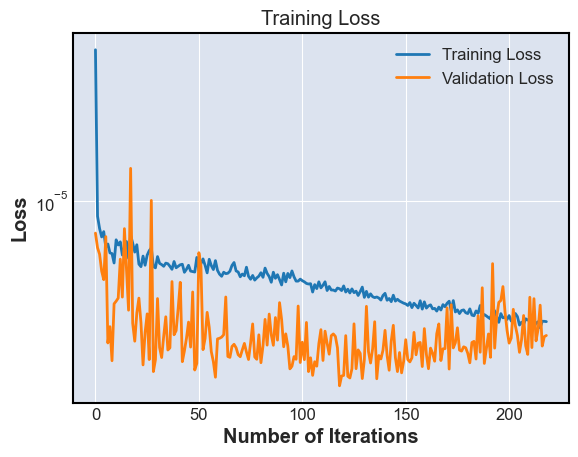

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Mean Squared Error: 5.786239685392489e-06
                           Expected  Predicted
Datetime                                      
2024-06-22 17:45:00+00:00 -0.000169   0.000052
2024-07-02 09:30:00+00:00 -0.000166  -0.000343
2024-06-30 15:00:00+00:00  0.000112  -0.000290
2024-07-04 03:15:00+00:00  0.001831  -0.000961
2024-06-17 03:30:00+00:00 -0.000757   0.000223
...                             ...        ...
2024-07-02 07:15:00+00:00 -0.000930   0.000180
2024-06-30 02:45:00+00:00  0.000692  -0.000578
2024-07-02 20:45:00+00:00 -0.001823  -0.000066
2024-07-03 08:15:00+00:00 -0.002049   0.000037
2024-07-08 12:30:00+00:00  0.000403   0.000297

[269 rows x 2 columns]
                           Expected  Predicted  Correct
Datetime                                               
2024-06-22 17:45:00+00:00 -0.000169   0.000052    False
2024-07-02 09:30:00+00:00 -0.000166  -0.000343     True
2024-06-30 15:00:00+00:00  0.000112  -0.000290    False
2024-

In [532]:
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
# log scale for y-axis
plt.yscale('log')
plt.legend()
plt.show()

# make predictions
predictions = model.predict(X_test_scaled)

# transform to 2d array
predictions = predictions.flatten()

# calculate the mean squared error
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')
# show expected and predicted values as a dataframe
df = pd.DataFrame({'Expected': Y_test, 'Predicted': predictions.flatten()})
df

print(df)

# for each line, add if it is correct or not (just use the sign of the expected and predicted values)
df['Correct'] = np.sign(df['Expected']) == np.sign(df['Predicted'])

print(df)

# calculate the percentage of correct predictions
correct = df['Correct'].sum()
total = len(df)

percentage = (correct / total) * 100

print(f'Percentage of correct predictions: {percentage:.2f}%')